In [1]:
import glob
from warnings import simplefilter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from tqdm.notebook import tqdm


simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [2]:
def clean_cloudy_line_file(filename, name='emissivity'):
    '''
    My method for making cloudy line emissivity files more user friendly. 
    To pull emissivities for a given line from each grid step, 
    read in the df and use df.loc['HE_2_1640.00A'] format. 
    '''
    df = pd.read_csv(filename, sep='\t+', header=0, names=[name], comment='#', engine='python')
    df = df[df.index.str.contains('iteration') == False]
    df.index = df.index.str.replace('  ', '_')
    df.index = df.index.str.replace(' ', '_')
    df.index = df.index.str[:-1]
    
    return df

def ohno_backhaus_2022(logneiiioii):
	'''
	defining the unv087 dividing line from Backhaus et al. 2021.
	Singularity at log(NeIII/OII) = 0.285
	'''    
	return 0.35/(2.8*logneiiioii - 0.8) + 0.64


def plot_ohno_backhaus_2022(ax):
    xohno = np.linspace(-2,0.285, 1000)
    ax.plot(xohno, ohno_backhaus_2022(xohno), c='black', ls='-', lw=3, label='Backhaus et al. 2022', zorder=-9)
  

def bpt_kewley_2001(logniiha):
	'''
	Defining the BPT AGN/SF dividing line from Kewley 2001.
	'''    
	return 0.61/(logniiha - 0.47) + 1.19   

def plot_bpt_kewley_2001(ax):
    x = np.linspace(-2,0.46, 1000)
    ax.plot(x, bpt_kewley_2001(x), c='black', ls=':', lw=3, label='Kewley et al. 2001', zorder=-9)
    

def bpt_kauffmann_2003(logniiha):
	'''
	Defining the BPT AGN/SF dividing line from Kauffmann 2003.
	'''    
	return 0.61/(logniiha - 0.05) + 1.3    

    
def plot_bpt_kauffmann_2003(ax):
    x = np.linspace(-2,0.04, 1000)
    ax.plot(x, bpt_kauffmann_2003(x), c='black', ls='-', lw=3, label='Kauffmann et al. 2003', zorder=-9)

def vo87_trump_2015(logsiiha):
	'''
	Defining the unVO87 AGN/SF dividing line from Trump et al. 2015.
	Singularity at log(SII/Ha) = 0.0917
	'''    
	return 0.48/(1.09*logsiiha - 0.10) + 1.3    


def plot_vo87_trump_2015(ax):
    x = np.linspace(-2,0.09, 1000)
    ax.plot(x, vo87_trump_2015(x), c='black', ls='-', lw=3, label= 'Trump et al. 2015', zorder=-9)
	

In [3]:
BPASS_135_300_single_hden3_path = "/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/BPASS/solar_abundances/hden3/BPASSv2.2.1_imf135_300_burst_single_models/"

catalog = pd.DataFrame()
for ilin in tqdm(glob.glob(f"{BPASS_135_300_single_hden3_path}**.ilin")):
    parameters = ilin.replace(BPASS_135_300_single_hden3_path, '').replace('.ilin', '')
    try:
        catalog[parameters] = clean_cloudy_line_file(ilin, name=parameters).copy()
    except:
        print(ilin)
        pass

linesdf = catalog.T
linesdf['logU'] = None
linesdf['zgas'] = None
linesdf['hden'] = None
linesdf['zstar'] = None
linesdf['age'] = None
linesdf['sed'] = None

for id, row in linesdf.iterrows():
    logU = float(id.rsplit('logU')[-1])
    zgas = float(id.replace(f'_logU{logU}', '').rsplit('z')[-1])
    hden = int(id.replace(f'_z{zgas}_logU{logU}', '').rsplit('hden')[-1])
    zstar = float(id.replace(f'_hden{hden}_z{zgas}_logU{logU}', '').rsplit('zstar')[-1])
    age = float(id.replace(f'_zstar{zstar}_hden{hden}_z{zgas}_logU{logU}', '').rsplit('age')[-1])
    sed = str(id.replace(f'_age{age}_zstar{zstar}_hden{hden}_z{zgas}_logU{logU}', '').rsplit('sed')[-1])
    linesdf.loc[id, 'logU'] = logU
    linesdf.loc[id, 'zgas'] = zgas
    linesdf.loc[id, 'hden'] = hden
    linesdf.loc[id, 'zstar'] = zstar
    linesdf.loc[id, 'age'] = age
    linesdf.loc[id, 'sed'] = sed

linesdf


  0%|          | 0/4563 [00:00<?, ?it/s]

/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/BPASS/solar_abundances/hden3/BPASSv2.2.1_imf135_300_burst_single_models/sedBPASSv2.2.1_imf135_300_burst_single.ascii_age11.0_zstar0.05_hden3_z0.05_logU-4.0.ilin
/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/BPASS/solar_abundances/hden3/BPASSv2.2.1_imf135_300_burst_single_models/sedBPASSv2.2.1_imf135_300_burst_single.ascii_age11.0_zstar0.05_hden3_z0.05_logU-2.0.ilin
/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/BPASS/solar_abundances/hden3/BPASSv2.2.1_imf135_300_burst_single_models/sedBPASSv2.2.1_imf135_300_burst_single.ascii_age11.0_zstar0.05_hden3_z0.05_logU-1.5.ilin
/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/BPASS/solar_abundances/hden3/BPASSv2.2.1_imf135_300_burst_single_models/sedBPASSv2.2.1_imf135_300_burst_single.ascii_age11.0_zstar0.05_hden3_z0.05_logU-3.5.ilin
/Users/njc5787/Research/cloudy_model_library/cloudy_mode

N_4_765.147A  \
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  1.457300e-03   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  0.000000e+00   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  1.710900e-03   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  1.427000e-04   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  4.231300e-05   
...                                                          ...   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  2.190400e-07   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  6.004900e-07   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  1.236800e-03   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  1.262000e-05   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  1.506100e-03   

                                                    N_3_991.000A  \
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  2.959000e-04   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  0.000000e+00   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  4.314000e-03   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  1.238300e-05   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  3.280100e-06   
...                                                          ...   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  2.788200e-08   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  2.793400e-08   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  4.433800e-05   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  4.041500e-08   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  2.700600e-04   

                                                    C_3_977.020A  \
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  1.592200e-02   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  8.099100e-08   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  2.306600e-02   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  2.966300e-03   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  7.657600e-04   
...                                                          ...   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  1.873000e-04   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  6.155700e-04   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  2.274400e+00   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  2.740500e-02   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...  1.992000e-02   

                                                    C_2_904.142A  \
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.001690   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.000005   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.000556   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.000316   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.000150   
...                                                          ...   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.000038   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.000150   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.003134   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.001837   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.001716   

                                                    C_2_1036.34A  \
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.002182   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.000046   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.000914   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.000602   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.000194   
...                                                          ...   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.000074   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.000229   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      7.676100   
sedBPASSv2.2.1_imf135_300_burst_single.ascii_ag...      0.008391   
sedBPASSv2.2.1_imf135_300_burst_sing

In [4]:
# /Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/AGN/solar_abundances/mbh9/sedmbh9_hden2_z0.1_logU-1.0.ilin

AGN_solar_path = "/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/AGN/solar_abundances/"

catalog = pd.DataFrame()
for ilin in tqdm(glob.glob(f"{AGN_solar_path}**/**.ilin")):
    parameters = ilin.replace(AGN_solar_path, '').replace('.ilin', '')
    try:
        catalog[parameters] = clean_cloudy_line_file(ilin, name=parameters).copy()
    except:
        print(ilin)
        pass

AGN_solar = catalog.T
AGN_solar['logU'] = None
AGN_solar['zgas'] = None
AGN_solar['hden'] = None
AGN_solar['mbh'] = None

for id, row in AGN_solar.iterrows():
    logU = float(id.rsplit('logU')[-1])
    zgas = float(id.replace(f'_logU{logU}', '').rsplit('z')[-1])
    hden = int(id.replace(f'_z{zgas}_logU{logU}', '').rsplit('hden')[-1])
    mbh = int(id.replace(f'_hden{hden}_z{zgas}_logU{logU}', '').rsplit('mbh')[-1])

    AGN_solar.loc[id, 'logU'] = logU
    AGN_solar.loc[id, 'zgas'] = zgas
    AGN_solar.loc[id, 'hden'] = hden
    AGN_solar.loc[id, 'mbh'] = mbh


AGN_solar

AGN_solar.to_csv('AGN_solar.csv')

  0%|          | 0/3549 [00:00<?, ?it/s]

/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/AGN/solar_abundances/mbh4/sedmbh4_hden3_z0.0005_logU-1.0.ilin
/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/AGN/solar_abundances/mbh4/sedmbh4_hden3_z0.005_logU-1.25.ilin
/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/AGN/solar_abundances/mbh4/sedmbh4_hden2_z0.0005_logU-1.5.ilin
/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/AGN/solar_abundances/mbh4/sedmbh4_hden2_z0.0005_logU-2.0.ilin
/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/AGN/solar_abundances/mbh4/sedmbh4_hden2_z0.005_logU-1.0.ilin
/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/AGN/solar_abundances/mbh4/sedmbh4_hden4_z0.0005_logU-1.5.ilin
/Users/njc5787/Research/cloudy_model_library/cloudy_model_library_complete/AGN/solar_abundances/mbh4/sedmbh4_hden4_z0.005_logU-1.5.ilin
/Users/njc5787/Research/cloudy_model_librar

/opt/miniconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


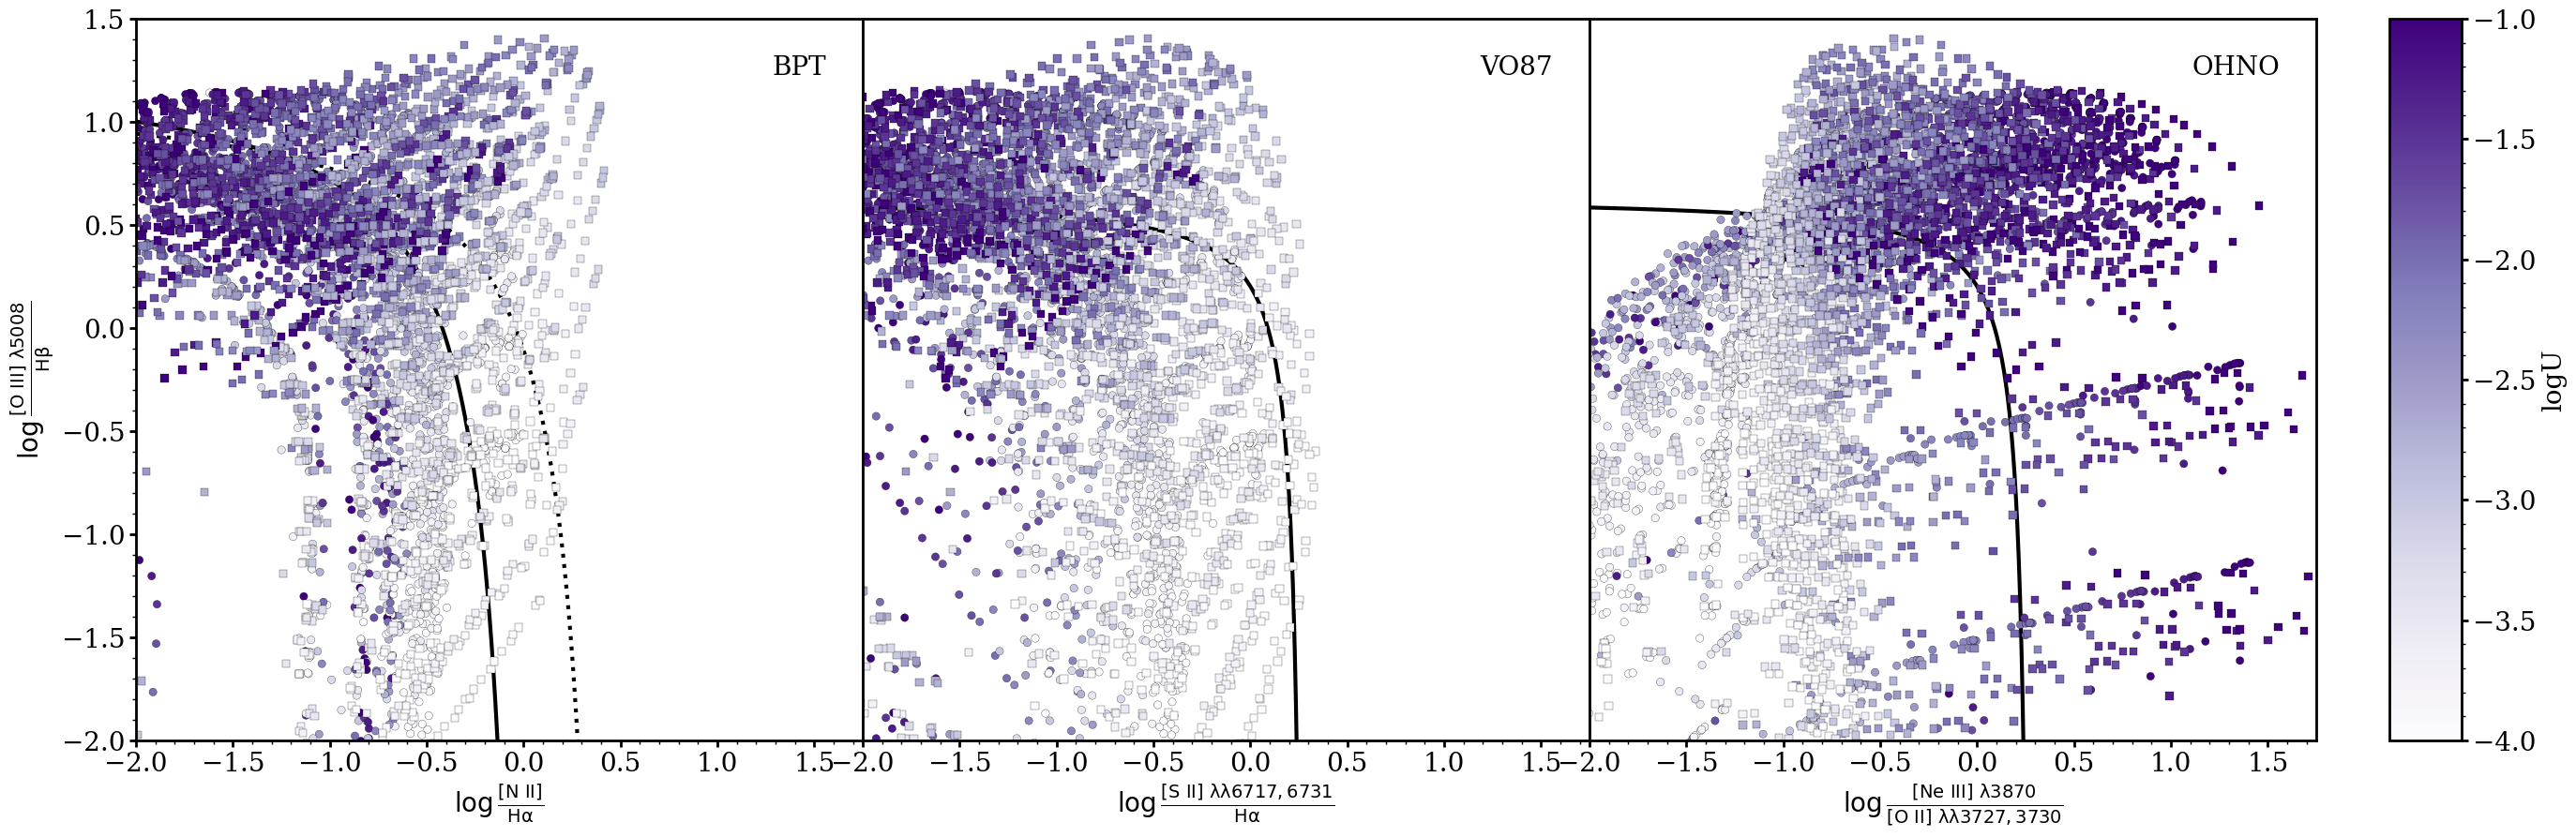

In [5]:
fig = plt.figure(figsize=(32,10))
gs = GridSpec(nrows=10, ncols=32)
gs.update(wspace=0.0, hspace=0.0)

ax = fig.add_subplot(gs[0:10, 0:10])
colorbar_data = ax.scatter(np.log10(linesdf['N_2_6583.45A']/linesdf['H_1_6562.81A']), np.log10(linesdf['O_3_5006.84A']/linesdf['H_1_4861.33A']), 
           c=linesdf['logU'], ec='k', linewidths=0.2, cmap='Purples', vmin=-4, vmax=-1)
colorbar_data = ax.scatter(np.log10(AGN_solar['N_2_6583.45A']/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['logU'], ec='k', linewidths=0.2, cmap='Purples', vmin=-4, vmax=-1, marker='s')
plot_bpt_kewley_2001(ax)
plot_bpt_kauffmann_2003(ax)
ax.set_xlim(-2, 1.75)
ax.set_ylim(-2, 1.5)
ax.set_xlabel(r'$\log\frac{\rm{[N~II]}}{\rm{H}\alpha}$')
ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
ax.annotate('BPT', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

ax = fig.add_subplot(gs[0:10, 10:20])
ax.scatter(np.log10((linesdf['S_2_6716.44A']+linesdf['S_2_6730.82A'])/linesdf['H_1_6562.81A']), np.log10(linesdf['O_3_5006.84A']/linesdf['H_1_4861.33A']), 
           c=linesdf['logU'], ec='k', linewidths=0.2, cmap='Purples', vmin=-4, vmax=-1)
ax.scatter(np.log10((AGN_solar['S_2_6716.44A']+AGN_solar['S_2_6730.82A'])/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['logU'], ec='k', linewidths=0.2, cmap='Purples', vmin=-4, vmax=-1, marker='s')
plot_ohno_backhaus_2022(ax)
ax.set_xlim(-2, 1.75)
ax.set_ylim(-2, 1.5)
ax.set_xlabel(r'$\log\frac{\rm{[S~II]}~\lambda\lambda6717,6731}{\rm{H}\alpha}$')
ax.tick_params(left=False, labelleft=False, which='both')
ax.annotate('VO87', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

ax = fig.add_subplot(gs[0:10, 20:30])
ax.scatter(np.log10(linesdf['Ne_3_3868.76A']/(linesdf['O_2_3726.03A']+linesdf['O_2_3728.81A'])), np.log10(linesdf['O_3_5006.84A']/linesdf['H_1_4861.33A']), 
           c=linesdf['logU'], ec='k', linewidths=0.2, cmap='Purples', vmin=-4, vmax=-1)
ax.scatter(np.log10(AGN_solar['Ne_3_3868.76A']/(AGN_solar['O_2_3726.03A']+AGN_solar['O_2_3728.81A'])), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['logU'], ec='k', linewidths=0.2, cmap='Purples', vmin=-4, vmax=-1, marker='s')
plot_ohno_backhaus_2022(ax)
ax.set_xlim(-2, 1.75)
ax.set_ylim(-2, 1.5)
ax.set_xlabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
ax.tick_params(left=False, labelleft=False, which='both')
ax.annotate('OHNO', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

ax = fig.add_subplot(gs[0:10, 31:32])
fig.colorbar(colorbar_data, ax, use_gridspec=True, label = 'logU')

plt.show()

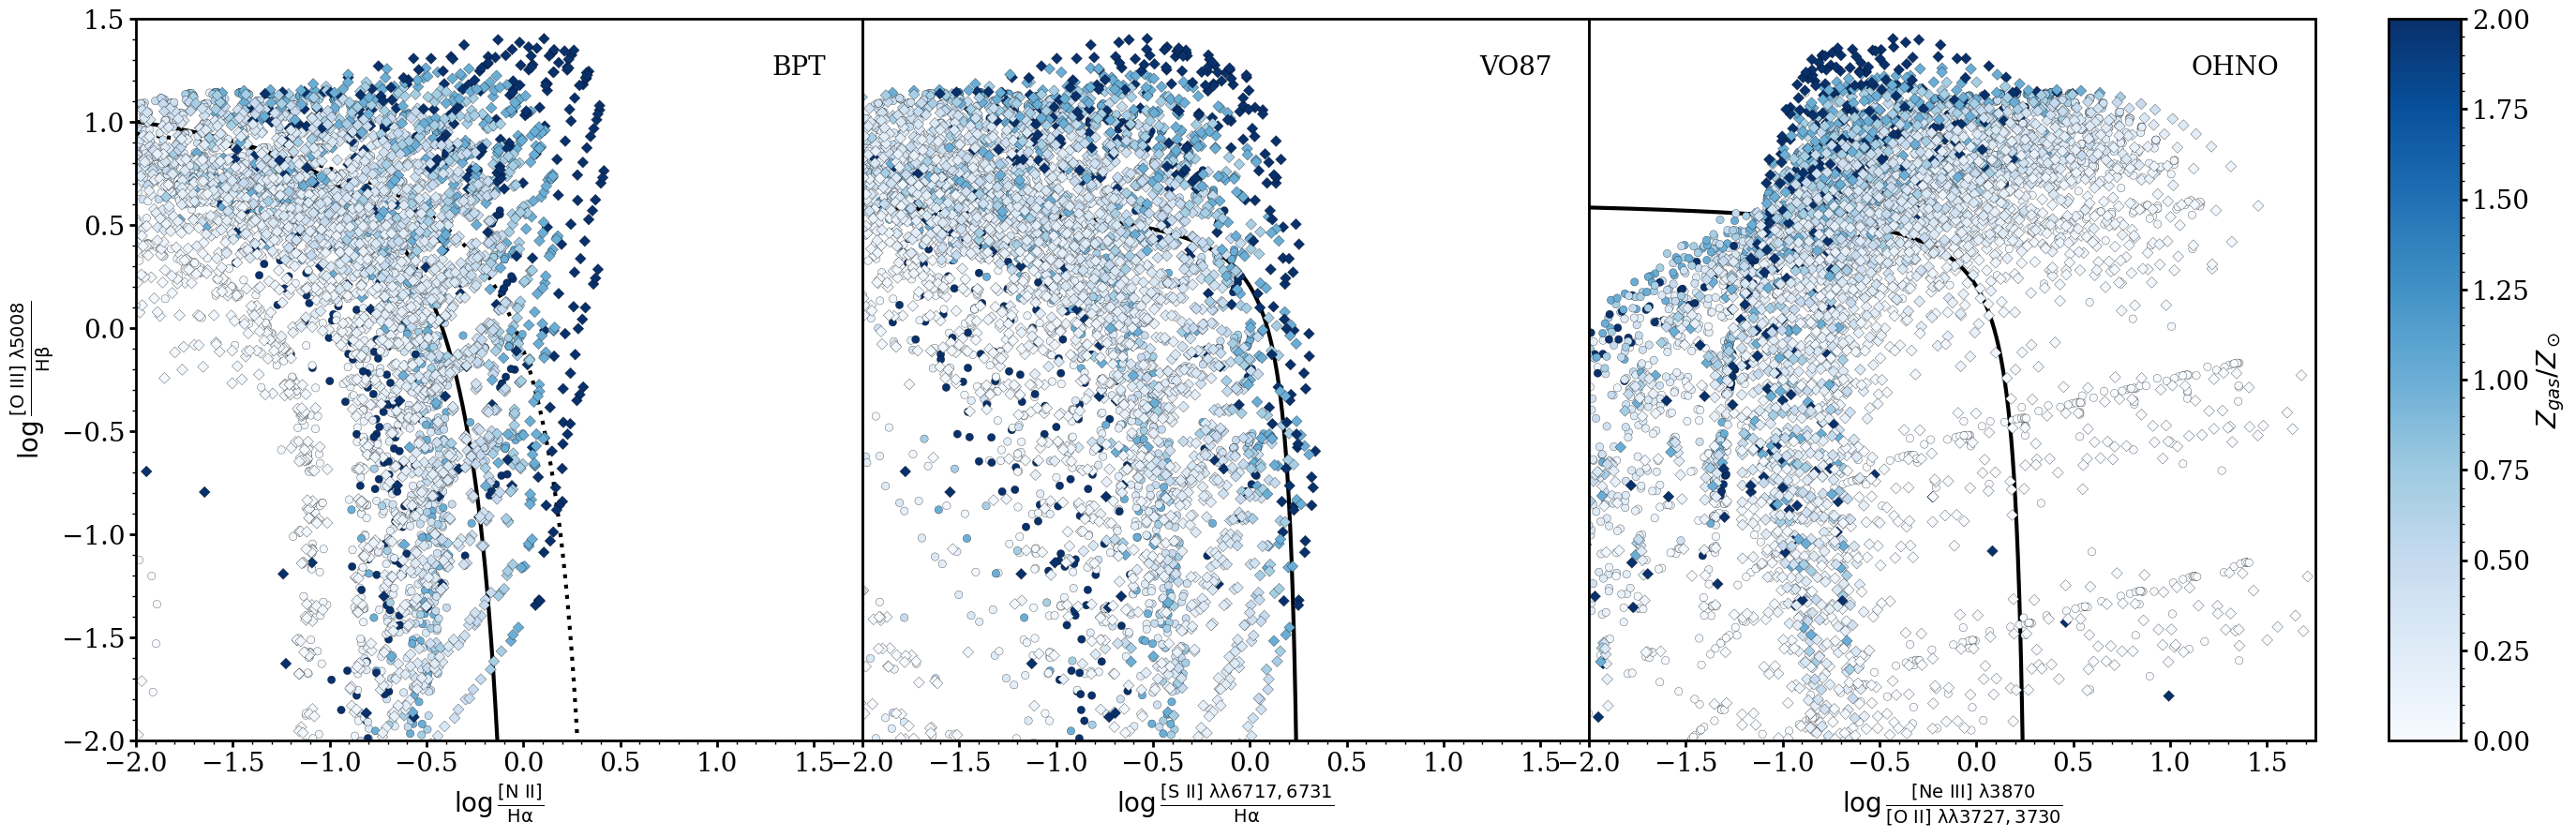

In [12]:
fig = plt.figure(figsize=(32,10))
gs = GridSpec(nrows=10, ncols=32)
gs.update(wspace=0.0, hspace=0.0)

ax = fig.add_subplot(gs[0:10, 0:10])
colorbar_data = ax.scatter(np.log10(linesdf['N_2_6583.45A']/linesdf['H_1_6562.81A']), np.log10(linesdf['O_3_5006.84A']/linesdf['H_1_4861.33A']), 
           c=linesdf['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2)
colorbar_data = ax.scatter(np.log10(AGN_solar['N_2_6583.45A']/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2, marker='D')
plot_bpt_kewley_2001(ax)
plot_bpt_kauffmann_2003(ax)
ax.set_xlim(-2, 1.75)
ax.set_ylim(-2, 1.5)
ax.set_xlabel(r'$\log\frac{\rm{[N~II]}}{\rm{H}\alpha}$')
ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
ax.annotate('BPT', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

ax = fig.add_subplot(gs[0:10, 10:20])
ax.scatter(np.log10((linesdf['S_2_6716.44A']+linesdf['S_2_6730.82A'])/linesdf['H_1_6562.81A']), np.log10(linesdf['O_3_5006.84A']/linesdf['H_1_4861.33A']), 
           c=linesdf['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2)
ax.scatter(np.log10((AGN_solar['S_2_6716.44A']+AGN_solar['S_2_6730.82A'])/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2, marker='D')
plot_ohno_backhaus_2022(ax)
ax.set_xlim(-2, 1.75)
ax.set_ylim(-2, 1.5)
ax.set_xlabel(r'$\log\frac{\rm{[S~II]}~\lambda\lambda6717,6731}{\rm{H}\alpha}$')
ax.tick_params(left=False, labelleft=False, which='both')
ax.annotate('VO87', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

ax = fig.add_subplot(gs[0:10, 20:30])
ax.scatter(np.log10(linesdf['Ne_3_3868.76A']/(linesdf['O_2_3726.03A']+linesdf['O_2_3728.81A'])), np.log10(linesdf['O_3_5006.84A']/linesdf['H_1_4861.33A']), 
           c=linesdf['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2)
ax.scatter(np.log10(AGN_solar['Ne_3_3868.76A']/(AGN_solar['O_2_3726.03A']+AGN_solar['O_2_3728.81A'])), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2, marker='D')
plot_ohno_backhaus_2022(ax)
ax.set_xlim(-2, 1.75)
ax.set_ylim(-2, 1.5)
ax.set_xlabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
ax.tick_params(left=False, labelleft=False, which='both')
ax.annotate('OHNO', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

ax = fig.add_subplot(gs[0:10, 31:32])
fig.colorbar(colorbar_data, ax, use_gridspec=True, label = '$Z_{gas}/Z_\odot$')

plt.show()

In [24]:
from pathlib import Path

def make_sphinx_df(sphinx_data_path):
    data = Path(sphinx_data_path).resolve()
    df = (pd.read_csv(data.joinpath('all_basic_data.csv'))
                .assign(
                OIII_Hb = lambda x: x['O__3_5006.84A_int'] / x['H__1_4861.32A_int'],
                O32 = lambda x: x['O__3_5006.84A_int'] / (x["O__2_3728.81A_int"] + x["O__2_3726.03A_int"]),
                R23 = lambda x: (x['O__3_5006.84A_int'] + x["O__3_4958.91A_int"] + x["O__2_3728.81A_int"] + x["O__2_3726.03A_int"]) / x["H__1_4861.32A_int"],
                NeIII_OII = lambda x: x["Ne_3_3868.76A_int"] / (x["O__2_3728.81A_int"] + x["O__2_3726.03A_int"]),
                log_OIII_Hb = lambda x: np.log10(x['O__3_5006.84A_int'] / x['H__1_4861.32A_int']),
                log_O32 = lambda x: np.log10(x['O__3_5006.84A_int'] / (x["O__2_3728.81A_int"] + x["O__2_3726.03A_int"])),
                log_R23 = lambda x: np.log10((x['O__3_5006.84A_int'] + x["O__3_4958.91A_int"] + x["O__2_3728.81A_int"] + x["O__2_3726.03A_int"]) / x["H__1_4861.32A_int"]),
                log_NeIII_OII = lambda x: np.log10(x["Ne_3_3868.76A_int"] / (x["O__2_3728.81A_int"] + x["O__2_3726.03A_int"])),
                log_LHa = lambda x: np.log10(x["H__1_6562.80A_int"]),
                )
    )
    return df

SPHINX_DATA = Path('/Users/njc5787/Research/SPHINX-20-data/data').resolve()

sphinx = make_sphinx_df(SPHINX_DATA)
sphinx['metallicity_solar'] = 10**sphinx['stellar_metallicity']/0.02
sphinx_groupby_z = sphinx.groupby('redshift').median().reset_index()
sphinx_groupby_z_std = sphinx.groupby('redshift').std().reset_index()



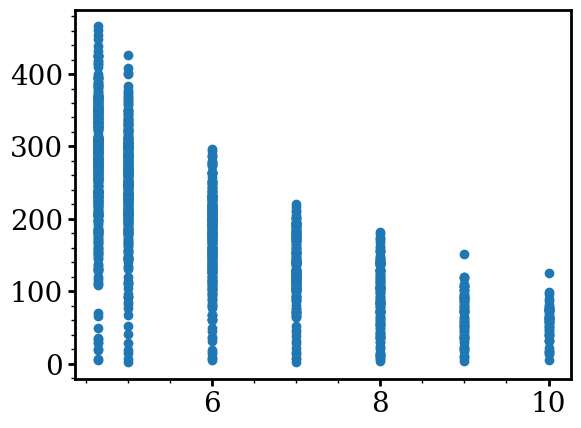

In [20]:
plt.scatter(sphinx['redshift'], sphinx['mean_stellar_age_mass'])

In [43]:
Z_errorbar = np.abs([sphinx['metallicity_solar'].quantile(.16)-sphinx['metallicity_solar'].quantile(.50), sphinx['metallicity_solar'].quantile(.84)-sphinx['metallicity_solar'].quantile(.50)])
Z_errorbar

array([0.02147322, 0.06573641])

In [ ]:
sphinx_groupby_z['metallicity_solar_16'] = [np.abs(sphinx_groupby_z['metallicity_solar'].quantile(q=0.16) - sphinx_groupby_z['metallicity_solar']) for z in sphinx_groupby_z['redshift'].unique()]

<ErrorbarContainer object of 3 artists>

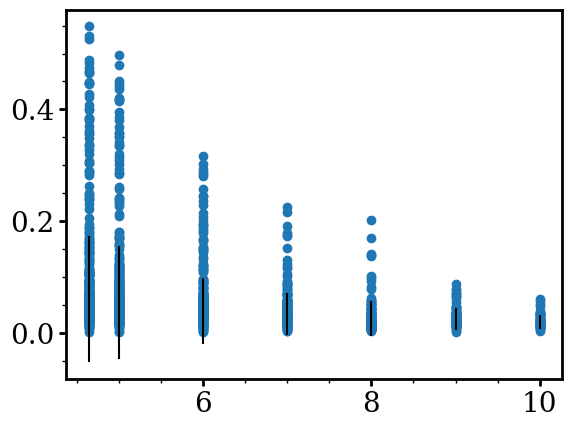

In [44]:
plt.scatter(sphinx['redshift'], sphinx['metallicity_solar'])
plt.errorbar(sphinx_groupby_z['redshift'], sphinx_groupby_z['metallicity_solar'],yerr=sphinx_groupby_z_std['metallicity_solar'], ls='None', c='k')



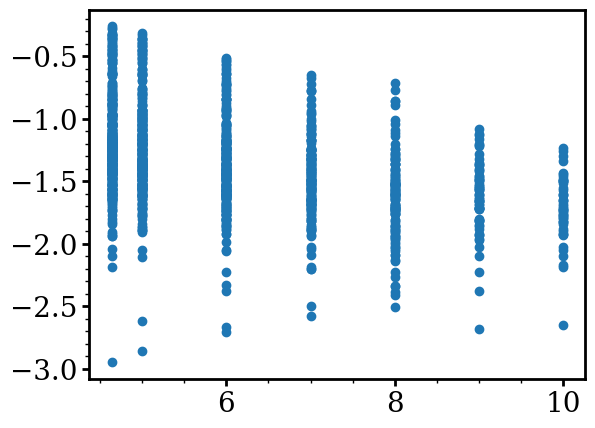

In [12]:
plt.scatter(sphinx['redshift'], sphinx['mean_stellar_metallicity_mass'])


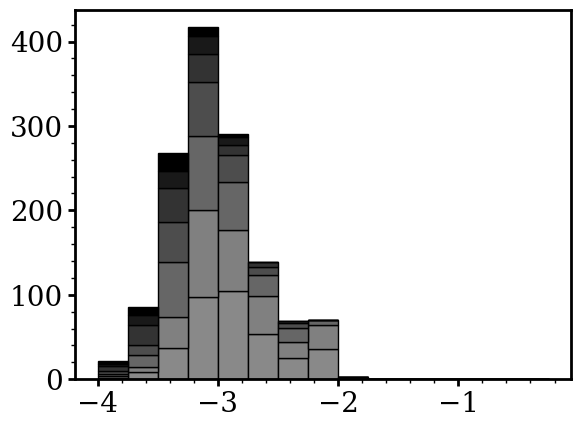

In [6]:
bins=np.arange(-4, 0, 0.25)
stellar_metallicity = [sphinx['stellar_metallicity'][sphinx.redshift == z] for z in [4.64, 5, 6, 7, 8, 9, 10]]
mean_stellar_metallicity_mass = [sphinx['mean_stellar_metallicity_mass'][sphinx.redshift == z] for z in [4.64, 5, 6, 7, 8, 9, 10]]

plt.figure()
plt.hist(stellar_metallicity, stacked=True, color=[f'{1-z/10}' for z in [4.64, 5, 6, 7, 8, 9, 10]], bins=bins, ec='k')
# plt.hist(mean_stellar_metallicity_mass, stacked=True, color=[f'{1-z/10}' for z in [4.64, 5, 6, 7, 8, 9, 10]], bins=bins, ec='k')


plt.show()

In [9]:
sphinx_groupby_z.columns

Index(['redshift', 'halo_id', 'x', 'y', 'z', 'mvir', 'rvir', 'stellar_mass',
       'sfr_3', 'sfr_5',
       ...
       'F480M_int', 'OIII_Hb', 'O32', 'R23', 'NeIII_OII', 'log_OIII_Hb',
       'log_O32', 'log_R23', 'log_NeIII_OII', 'log_LHa'],
      dtype='object', length=912)

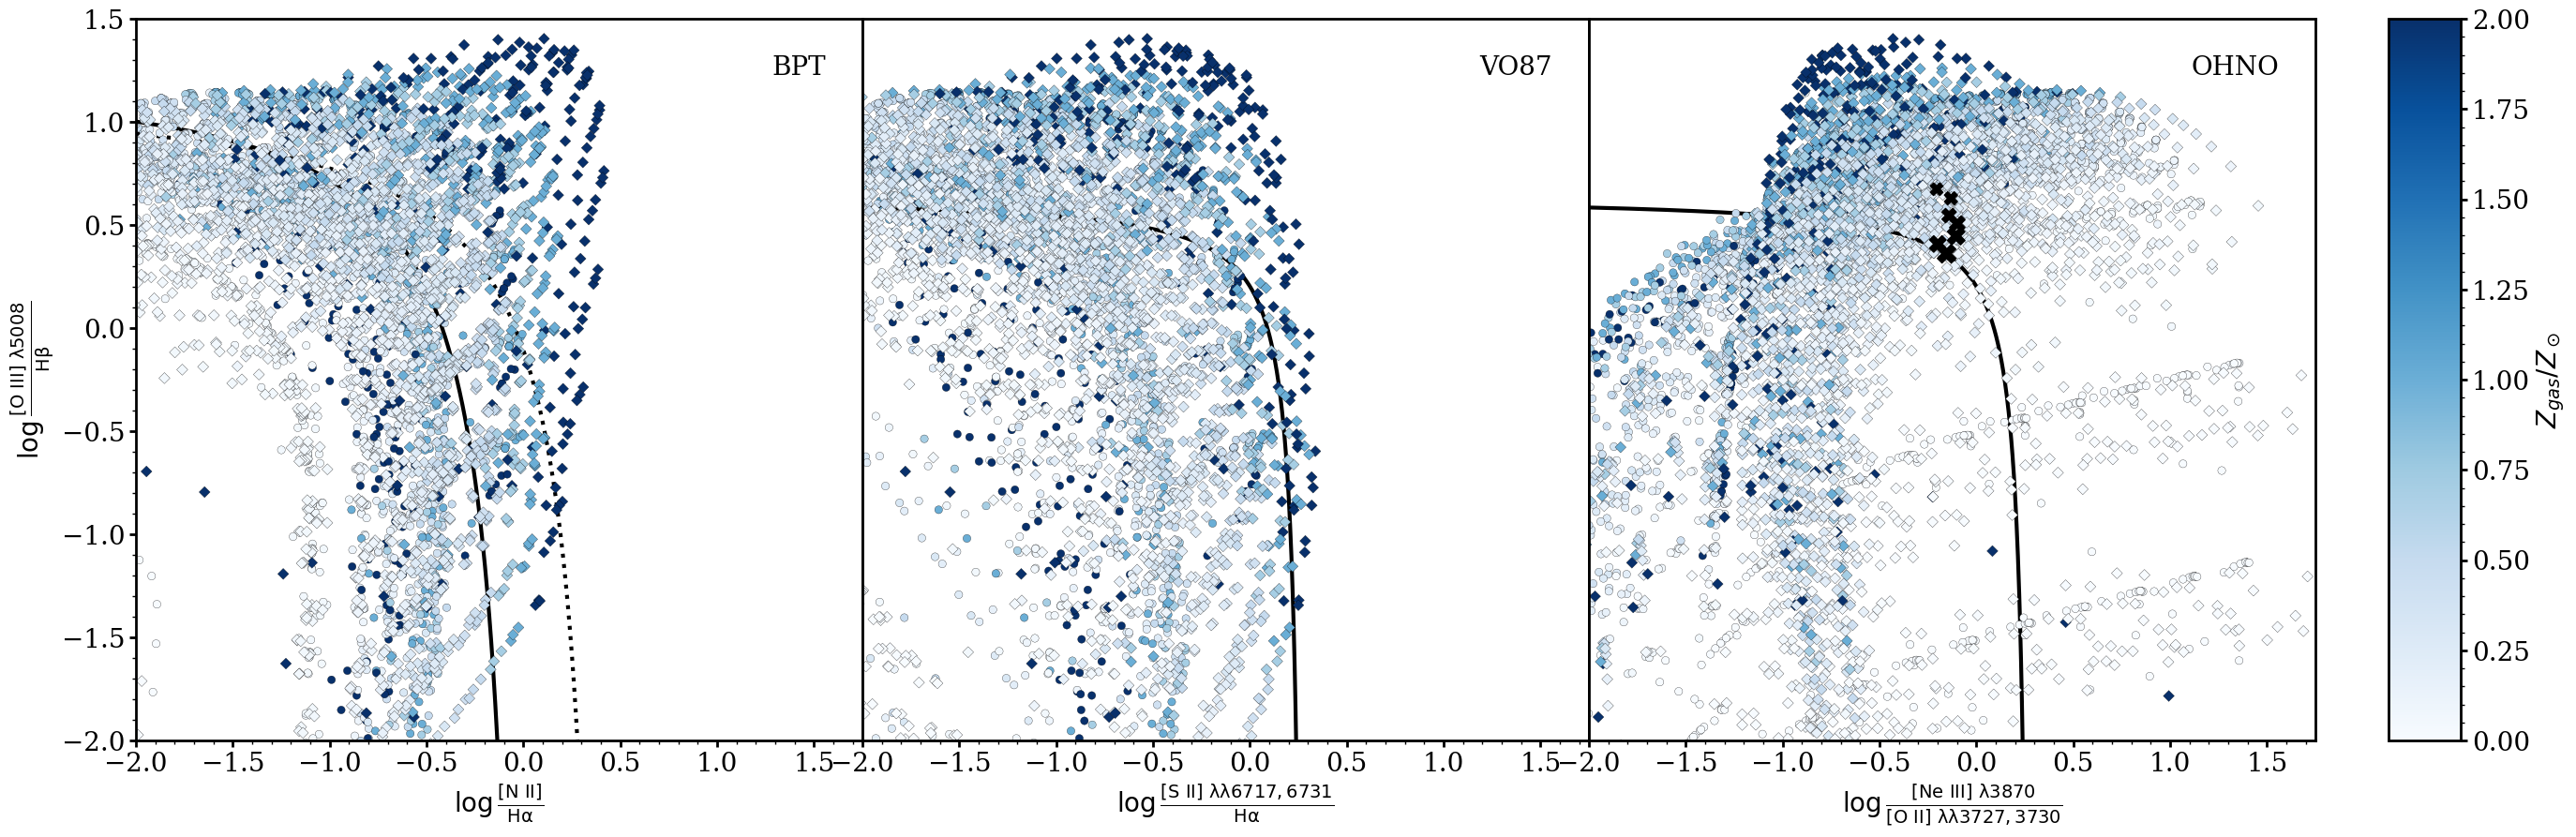

In [26]:
fig = plt.figure(figsize=(32,10))
gs = GridSpec(nrows=10, ncols=32)
gs.update(wspace=0.0, hspace=0.0)

ax = fig.add_subplot(gs[0:10, 0:10])
colorbar_data = ax.scatter(np.log10(linesdf['N_2_6583.45A']/linesdf['H_1_6562.81A']), np.log10(linesdf['O_3_5006.84A']/linesdf['H_1_4861.33A']), 
           c=linesdf['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2)
colorbar_data = ax.scatter(np.log10(AGN_solar['N_2_6583.45A']/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2, marker='D')
plot_bpt_kewley_2001(ax)
plot_bpt_kauffmann_2003(ax)
ax.set_xlim(-2, 1.75)
ax.set_ylim(-2, 1.5)
ax.set_xlabel(r'$\log\frac{\rm{[N~II]}}{\rm{H}\alpha}$')
ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
ax.annotate('BPT', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

ax = fig.add_subplot(gs[0:10, 10:20])
ax.scatter(np.log10((linesdf['S_2_6716.44A']+linesdf['S_2_6730.82A'])/linesdf['H_1_6562.81A']), np.log10(linesdf['O_3_5006.84A']/linesdf['H_1_4861.33A']), 
           c=linesdf['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2)
ax.scatter(np.log10((AGN_solar['S_2_6716.44A']+AGN_solar['S_2_6730.82A'])/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2, marker='D')
plot_ohno_backhaus_2022(ax)
ax.set_xlim(-2, 1.75)
ax.set_ylim(-2, 1.5)
ax.set_xlabel(r'$\log\frac{\rm{[S~II]}~\lambda\lambda6717,6731}{\rm{H}\alpha}$')
ax.tick_params(left=False, labelleft=False, which='both')
ax.annotate('VO87', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

ax = fig.add_subplot(gs[0:10, 20:30])
ax.scatter(np.log10(linesdf['Ne_3_3868.76A']/(linesdf['O_2_3726.03A']+linesdf['O_2_3728.81A'])), np.log10(linesdf['O_3_5006.84A']/linesdf['H_1_4861.33A']), 
           c=linesdf['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2)
ax.scatter(np.log10(AGN_solar['Ne_3_3868.76A']/(AGN_solar['O_2_3726.03A']+AGN_solar['O_2_3728.81A'])), np.log10(AGN_solar['O_3_5006.84A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2, marker='D')
ax.scatter(np.log10(sphinx_groupby_z['NeIII_OII']), np.log10(sphinx_groupby_z['OIII_Hb']), c='k', s=20*sphinx_groupby_z['redshift'], marker='X')
plot_ohno_backhaus_2022(ax)
ax.set_xlim(-2, 1.75)
ax.set_ylim(-2, 1.5)
ax.set_xlabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
ax.tick_params(left=False, labelleft=False, which='both')
ax.annotate('OHNO', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

ax = fig.add_subplot(gs[0:10, 31:32])
fig.colorbar(colorbar_data, ax, use_gridspec=True, label = '$Z_{gas}/Z_\odot$')

plt.show()

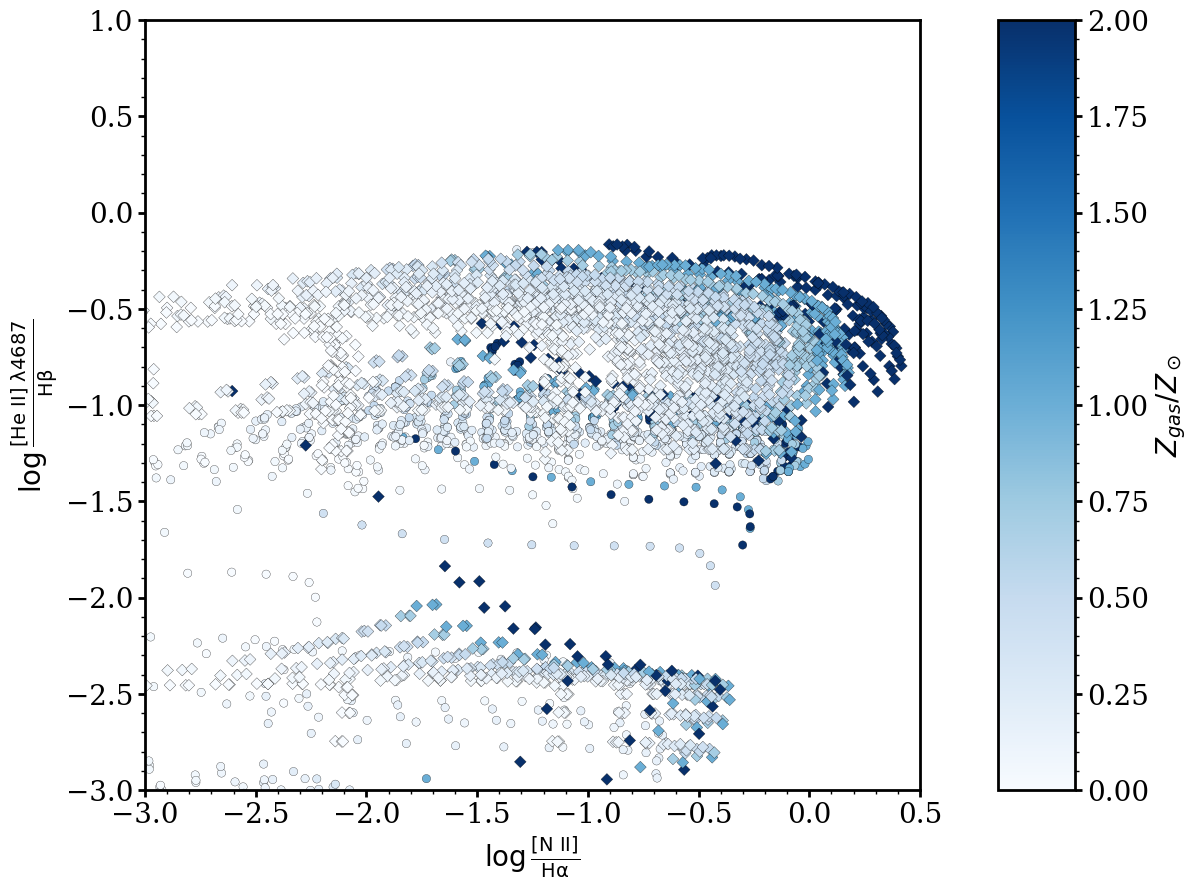

In [56]:
fig = plt.figure(figsize=(32,10))
gs = GridSpec(nrows=10, ncols=32)
gs.update(wspace=0.0, hspace=0.0)

ax = fig.add_subplot(gs[0:10, 0:10])
colorbar_data = ax.scatter(np.log10(linesdf['N_2_6583.45A']/linesdf['H_1_6562.81A']), np.log10(linesdf['He_2_4685.64A']/linesdf['H_1_4861.33A']), 
           c=linesdf['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2)
colorbar_data = ax.scatter(np.log10(AGN_solar['N_2_6583.45A']/AGN_solar['H_1_6562.81A']), np.log10(AGN_solar['He_2_4685.64A']/AGN_solar['H_1_4861.33A']), 
           c=AGN_solar['zgas'], ec='k', linewidths=0.2, cmap='Blues', vmin=0, vmax=2, marker='D')
# plot_bpt_kewley_2001(ax)
# plot_bpt_kauffmann_2003(ax)
ax.set_xlim(-3, 0.5)
ax.set_ylim(-3, 1)
ax.set_xlabel(r'$\log\frac{\rm{[N~II]}}{\rm{H}\alpha}$')
ax.set_ylabel(r'$\log\frac{\rm{[He~II]}~\lambda4687}{\rm{H}\beta}$')
# ax.annotate('BPT', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top')

ax = fig.add_subplot(gs[0:10, 11:12])
fig.colorbar(colorbar_data, ax, use_gridspec=True, label = '$Z_{gas}/Z_\odot$')

plt.show()